In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

<Axes: >

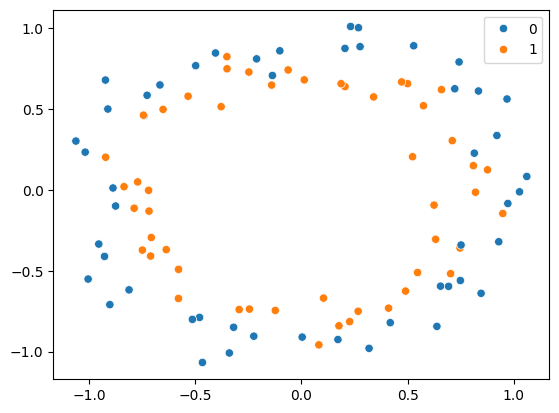

In [7]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
X,y
import matplotlib.pyplot as plt
# plt.scatter(X[:,0],X[:,1])
sns.scatterplot(x=X[:, 0], y=X[:, 1],hue=y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [32]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0)

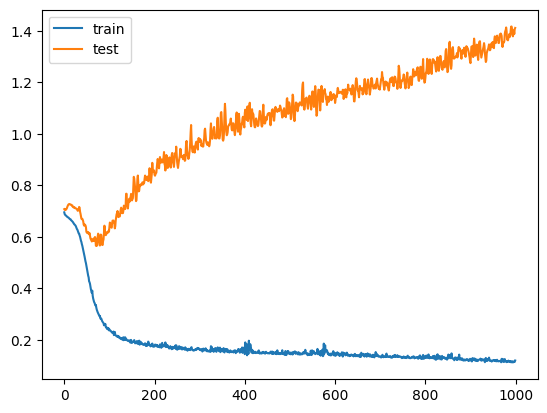

In [34]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 9s 928us/step


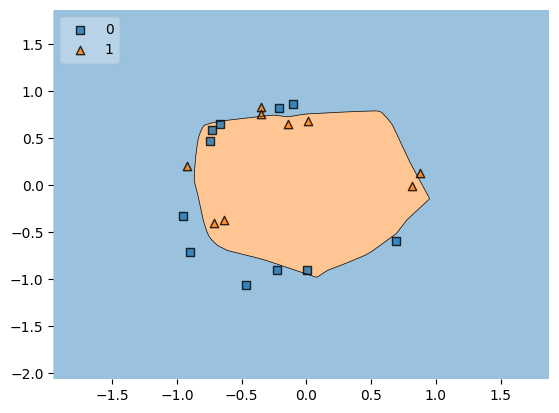

In [35]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

In [42]:
#Using early stopping 

model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [44]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 1s 83ms/step - loss: 0.6959 - accuracy: 0.4500 - val_loss: 0.7034 - val_accuracy: 0.4000
Epoch 2/3500
3/3 [==============================] - 0s 25ms/step - loss: 0.6890 - accuracy: 0.5375 - val_loss: 0.7052 - val_accuracy: 0.3500
Epoch 3/3500
3/3 [==============================] - 0s 20ms/step - loss: 0.6876 - accuracy: 0.5375 - val_loss: 0.7046 - val_accuracy: 0.4000
Epoch 4/3500
3/3 [==============================] - 0s 18ms/step - loss: 0.6846 - accuracy: 0.5375 - val_loss: 0.7063 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.6835 - accuracy: 0.5375 - val_loss: 0.7067 - val_accuracy: 0.4500
Epoch 6/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.6815 - accuracy: 0.5375 - val_loss: 0.7101 - val_accuracy: 0.4000
Epoch 7/3500
3/3 [==============================] - 0s 16ms/step - loss: 0.6797 - accuracy: 0.5375 - val_loss: 0.7119 - val_accuracy: 0.4500
Epoch 8/3500


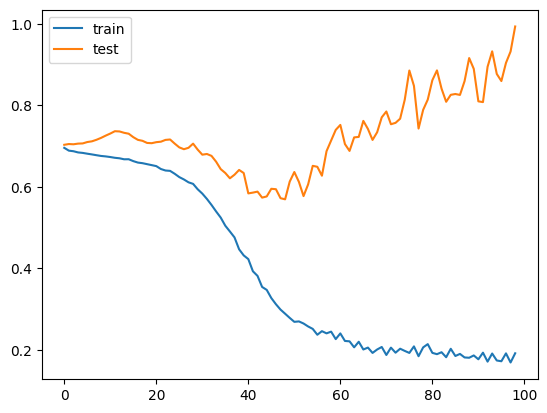

In [45]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 10s 1000us/step


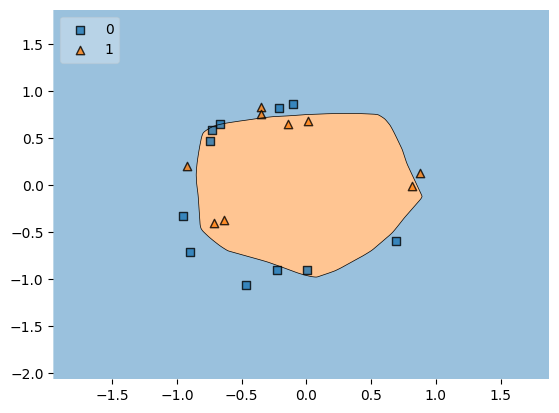

In [46]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()